In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import spatial
import time
import scipy.linalg
import healpy as hp

sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

%load_ext autoreload
%autoreload 2
%connect_info

/home/deparis/Emma
{
  "stdin_port": 38611,
  "ip": "127.0.0.1",
  "shell_port": 56865,
  "iopub_port": 49811,
  "signature_scheme": "hmac-sha256",
  "hb_port": 60781,
  "transport": "tcp",
  "control_port": 50675,
  "key": "b35156a0-7553-4620-8f59-dd0263b59f7b"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /run/user/1003/jupyter/kernel-a2c15334-7904-4b49-bad7-c9ad6d53eeae.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [4]:
runset=db.Runset()
runset.load()
runset.get_description()
runset.get_folder()

00 run de base -> m2
01 masse d'etoile *8 -> m1
02 même masse d'étoile mais pas de SN
03 masse d'etoile *8 mais pas de SN
04 masse d'étoile /8 -> m3
05 même masse d'étoile mais SN thermique
06 même masse d'étoile mais SN kin simple sans eject
07 même masse d'étoile mais SN kin simple avec eject
08 même masse d'étoile mais sans tirage de Poisson __ DOUTE
09 tout pareil mais avec flux __ PROBLEME
10 RERUN tout pareil mais avec flux
00 /home/deparis/curie_data/data/8_8_gather_6/
01 /home/deparis/curie_data/data/8_8_gather_7/
02 /home/deparis/curie_data/data/8_8_gather_8/
03 /home/deparis/curie_data/data/8_8_gather_9/
04 /home/deparis/curie_data/data/8_8_gather_10/
05 /home/deparis/curie_data/data/8_8_gather_11/
06 /home/deparis/curie_data/data/8_8_gather_12/
07 /home/deparis/curie_data/data/8_8_gather_13/
08 /home/deparis/curie_data/data/8_8_gather_14/
09 /home/deparis/curie_data/data/8_8_gather_15/
10 /home/deparis/curie_data/data/8_8_gather_16/


In [5]:
run1=io.Run(runset.runs[10].folder)

In [6]:
cur_run=run1
cur_step=cur_run.step_00017

In [29]:
#cur_cat.gen(8,cur_run.param.info.nproc)

# cur_step.fof.read_masst()
# cur_step.fof.read_struct()

cur_step.fof.get_R200(cur_run.param.info.ob, cur_run.param.info.om)

#________________________________________________________________________
cur_step.fof.get_part(cur_step.part, force=0)
cur_step.fof.get_part_mass(cur_step.part,cur_run.param.info)

# cur_step.fof.get_part_fine(cur_step.part, force=0)
cur_step.fof.get_part_mass_fine(cur_run.param.info)

#________________________________________________________________________
cur_step.fof.get_star(cur_step.star, force=0)
cur_step.fof.get_star_mass(cur_step.star,cur_run.param.info)

cur_step.fof.get_stars_fine(cur_step.grid, cur_step.star)
cur_step.fof.get_star_mass_fine(cur_step.star,cur_run.param.info)

#________________________________________________________________________
cur_step.fof.get_cells(cur_step.grid, force=0)
cur_step.fof.get_gas_mass(cur_step.grid,cur_run.param.info)

cur_step.fof.get_cells_fine(cur_step.grid)
cur_step.fof.get_gas_mass_fine(cur_step.grid,cur_run.param.info)

#________________________________________________________________________

cur_step.fof.get_mean_vel()


part_mass allready loaded, use force=1 to reload
star_mass allready loaded, use force=1 to reload
loading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/cells
loading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/cells_fine
grid_l allready loaded, use force=1 to reload
grid_field.d allready loaded, use force=1 to reload


<IPython.core.display.Javascript object>


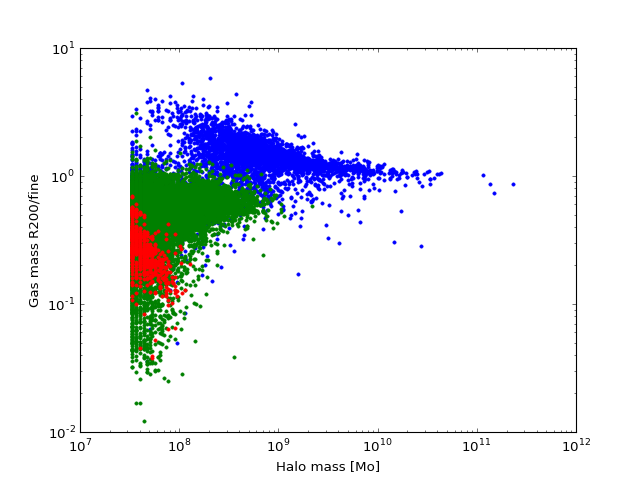

In [33]:
cur_cat=cur_step.fof
plt.figure()

x=cur_cat.halo_mass_fine
y=cur_cat.gas_mass/cur_cat.gas_mass_fine

ncells=np.zeros(cur_cat.nfoftot)
l=np.empty(cur_cat.nfoftot, dtype=np.object)
lmax=np.zeros(cur_cat.nfoftot)
lmean=np.zeros(cur_cat.nfoftot)

for i in range(cur_cat.nfoftot):
    ncells[i]=len(cur_cat.cells_fine[i])
    if ncells[i]:
        l[i]=np.unique(cur_step.grid.l.data[cur_cat.cells_fine[i]])
        lmax[i]=np.max(cur_step.grid.l.data[cur_cat.cells_fine[i]])
        lmean[i]=np.mean(cur_step.grid.l.data[cur_cat.cells_fine[i]])
        
        
mask=lmax==11
plt.plot(x[mask], y[mask],'.', label="lmax=11")
mask=lmax==10
plt.plot(x[mask], y[mask],'.', label="lmax=10")
mask=lmax==9
plt.plot(x[mask], y[mask],'.', label="lmax=9")


# for i in range(cat1.nfoftot):
#     if len(l[i])==1:
#         plt.plot(x[i], y[i],'k.')



plt.xscale('log')
plt.yscale('log')

plt.xlabel("Halo mass [Mo]")
plt.ylabel("Gas mass R200/fine")

# plt.legend()

<IPython.core.display.Javascript object>


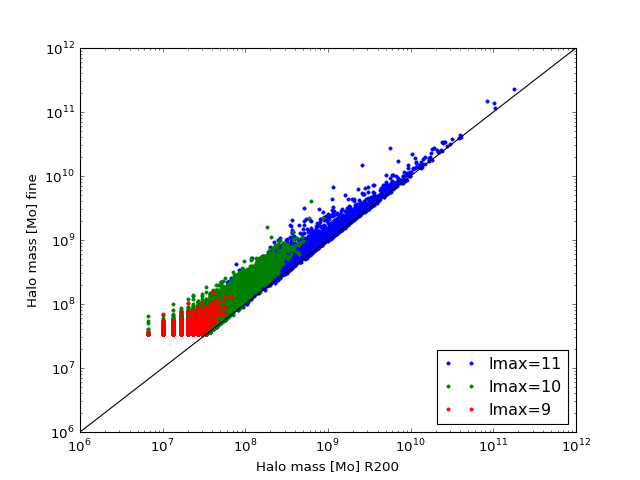

In [50]:
cur_cat=cur_step.fof
plt.figure()

x=cur_cat.part_mass
y=cur_cat.halo_mass_fine

        
mask=lmax==11
plt.plot(x[mask], y[mask],'.', label="lmax=11")
mask=lmax==10
plt.plot(x[mask], y[mask],'.', label="lmax=10")
mask=lmax==9
plt.plot(x[mask], y[mask],'.', label="lmax=9")

x=np.logspace(6,12)
plt.plot(x,x,'k')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Halo mass [Mo] R200")
plt.ylabel("Halo mass [Mo] fine")

plt.legend(loc=4)

In [ ]:
cur_step.grid.l.read()

V_200=4./3*np.pi*cur_cat.R200**3
V_fine=np.zeros(cur_cat.nfoftot)
for i in range(cur_cat.nfoftot):
    ncells[i]=len(cur_cat.cells_fine[i])
    if ncells[i]:
        V_fine[i]=np.sum( np.power(0.5,3*cur_step.grid.l.data[cur_cat.cells_fine[i]]))

x=cur_cat.halo_mass        
y=V_200/V_fine


plt.figure(figsize=(9,9))

x=V_200
y=V_fine

plt.plot(x,y,'.')


# mask=lmax==11
# plt.plot(x[mask], y[mask],'.', label="lmax=11")
# mask=lmax==10
# plt.plot(x[mask], y[mask],'.', label="lmax=10")
# mask=lmax==9
# plt.plot(x[mask], y[mask],'.', label="lmax=9")

plt.xscale('log')
plt.yscale('log')

# plt.xlabel("Halo mass [Mo]")
# plt.ylabel("Gas mass R200/fine")

plt.xlim(1e-10, 1e-4)
plt.ylim(1e-10, 1e-4)
plt.legend()

In [48]:
plt.figure()

ncells=np.zeros(cur_cat.nfoftot)
lmax=np.zeros(cur_cat.nfoftot)
lmean=np.zeros(cur_cat.nfoftot)

for i in range(cur_cat.nfoftot):
    ncells[i]=len(cur_cat.cells[i])
    if ncells[i]:
        lmax[i]=np.max(cur_step.grid.l.data[cur_cat.cells[i]])
        lmean[i]=np.mean(cur_step.grid.l.data[cur_cat.cells[i]])

mask=lmax==11
plt.plot(cur_cat.halo_mass[mask], ncells[mask],'.', label="lmax=11")
mask=lmax==10
plt.plot(cur_cat.halo_mass[mask], ncells[mask],'.', label="lmax=10")
mask=lmax==9
plt.plot(cur_cat.halo_mass[mask], ncells[mask],'.', label="lmax=9")

plt.legend(loc=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('halo mass [Mo]')
plt.ylabel('# of cells')

<IPython.core.display.Javascript object>

AttributeError: 'Fof' object has no attribute 'halo_mass'

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload


<IPython.core.display.Javascript object>


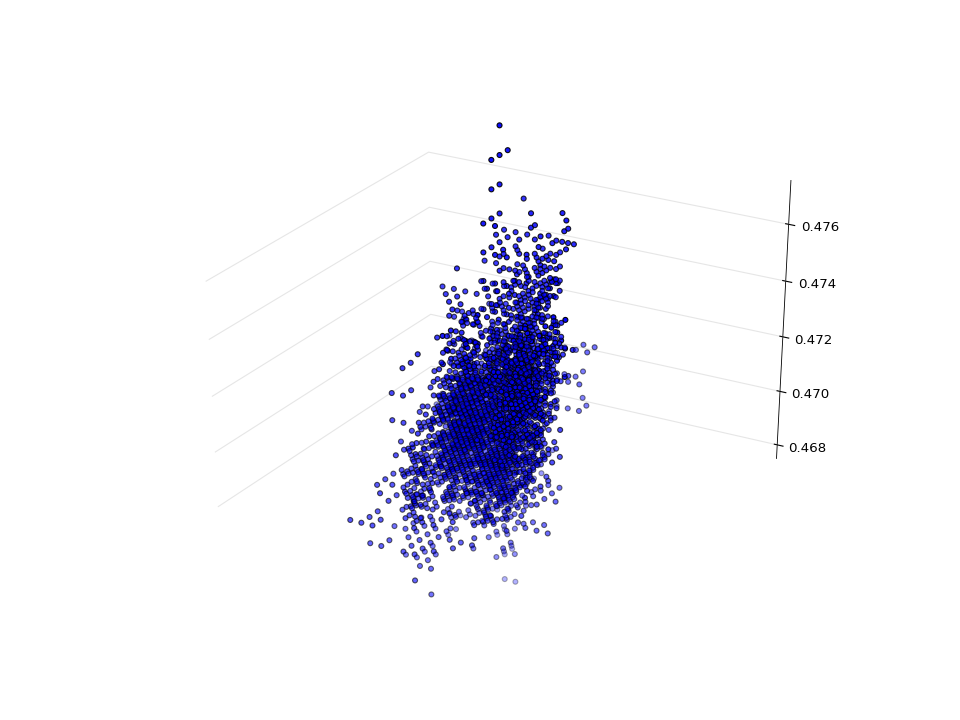

In [53]:
x=cur_step.grid.x.read()
y=cur_step.grid.y.read()
z=cur_step.grid.z.read()


fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
cells=cur_cat.cells_fine[np.argsort(cur_cat.part_n)[-30]]
x=cur_step.grid.x.data[cells]
y=cur_step.grid.y.data[cells]
z=cur_step.grid.z.data[cells]

ax.scatter(x,y,z, '.')
ax.set_axis_off()

<IPython.core.display.Javascript object>


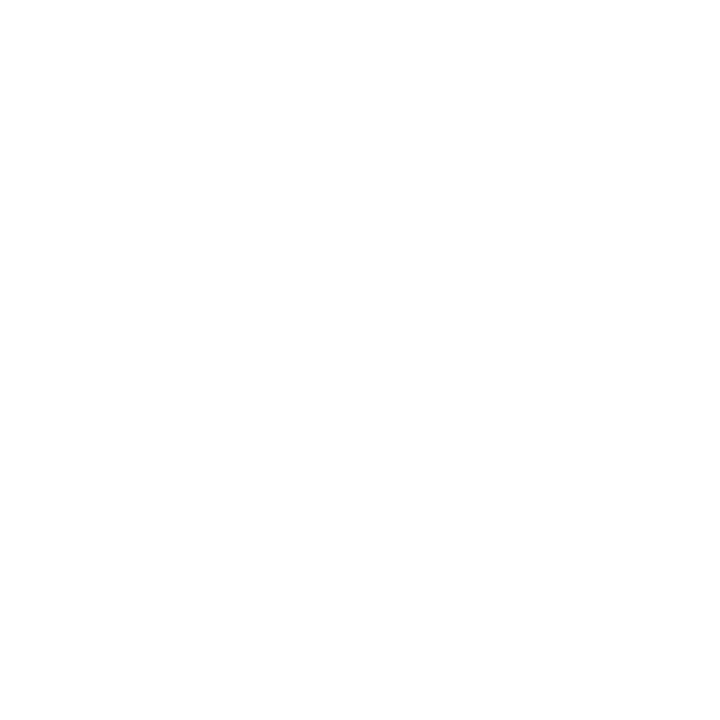

In [75]:
halo_num = np.argsort(cur_cat.part_n)[-100]

x=cur_step.fof.part_pos[halo_num][0::3]
y=cur_step.fof.part_pos[halo_num][1::3]
z=cur_step.fof.part_pos[halo_num][2::3]

# fig = plt.figure(figsize=(12,9))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x,y,z, '.')

plt.figure(figsize=(9,9))
plt.plot(x,y, 'w.')
# plt.grid()
plt.axis('off')
plt.savefig("point.jpg")

# Baryonic fraction

<IPython.core.display.Javascript object>


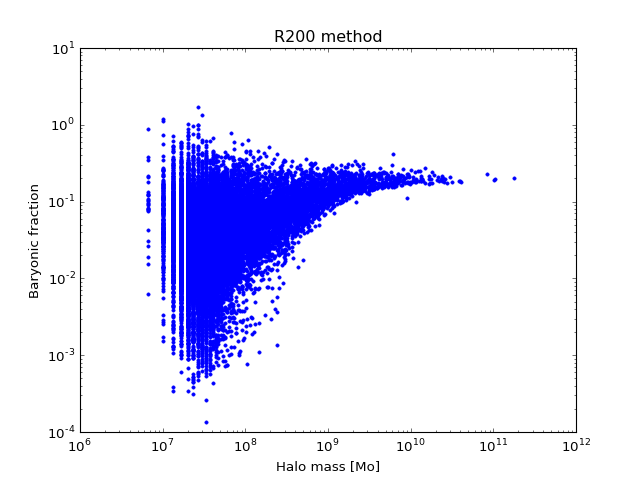

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


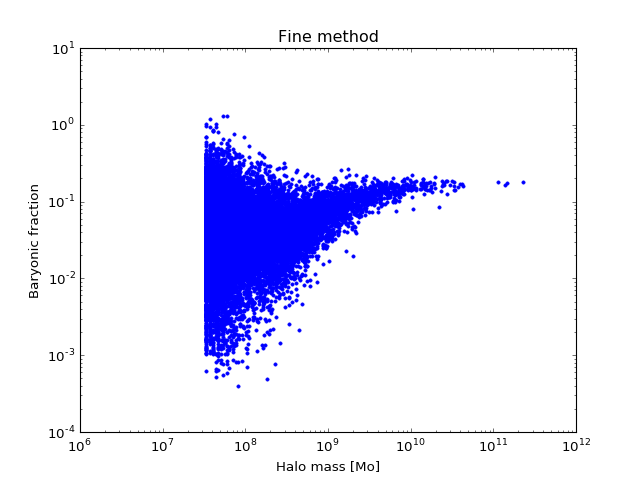

In [41]:
plt.figure()
plt.title('R200 method')

x=cur_cat.part_mass
y=(cur_cat.star_mass+cur_cat.gas_mass)/ cur_cat.part_mass

plt.plot(x,y,'.')
plt.xlim(1e6,1e12)
plt.ylim(1e-4,1e1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Halo mass [Mo]')
plt.ylabel('Baryonic fraction')

#############################################################

plt.figure()
plt.title('Fine method')

x=cur_cat.halo_mass_fine
y=(cur_cat.star_mass_fine+cur_cat.gas_mass_fine)/ cur_cat.halo_mass_fine

plt.xlim(1e6,1e12)
plt.ylim(1e-4,1e1)
plt.plot(x,y,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Halo mass [Mo]')
plt.ylabel('Baryonic fraction')

In [ ]:


def hist2d(X_all, Y_all, **kwargs):
    n=256
    xedges=np.logspace(np.min(X_all),np.max(X_all),n)
    yedges=np.logspace(np.min(Y_all),np.max(Y_all),n)

    x=np.log10(X_all)
    y=np.log10(Y_all)

    H,yedges,xedges=np.histogram2d(y,x,bins=n, **kwargs)
    X, Y = np.meshgrid(xedges, yedges)
    H = np.ma.masked_where(H==0,H) 

    plt.pcolormesh(X, Y, np.log(H))
    #plt.pcolormesh(X, Y, H)

    cb=plt.colorbar()
    cb.set_label('log10 of number of occurence')

    plt.xlim(xedges[0], xedges[-1])
    plt.ylim(yedges[0], yedges[-1])


plt.figure()
plt.title('R200 method')


x=cur_cat.halo_mass
y=(cur_cat.star_mass+cur_cat.gas_mass)/ cur_cat.halo_mass

hist2d(x,y)

# Nbins=64
# xbins = 10**np.linspace(np.log10(np.min(x)),np.log10(np.max(x)),Nbins+1)

# ybins = 10**np.linspace(np.log10(np.min(y)),np.log10(np.max(y)),Nbins+1)


# h,xedges, yedges=np.histogram2d(x,y, bins=(xbins, ybins) )


# plt.imshow(np.log10(h),interpolation="none", origin='lower',
#                 extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()



plt.ylim(1e-4,1e1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Halo mass [Mo]')
plt.ylabel('Baryonic fraction')

#############################################################



# STELLAR MASS COMPARAISON

In [42]:
#Fraction of stellar mass in halo with R200 methode

mstot=np.sum(cur_step.star.mass.data/1.9891e30*cur_run.param.info.unit_mass)
mshalo=np.sum(cur_cat.star_mass)

print(mshalo/mstot)

0.91717833155


In [43]:
#Fraction of stellar mass in halo with fine methode

mstot=np.sum(cur_step.star.mass.data/1.9891e30*cur_run.param.info.unit_mass)
mshalo=np.sum(cur_step.fof.star_mass_fine)

print(mshalo/mstot)

0.976392313866


<IPython.core.display.Javascript object>


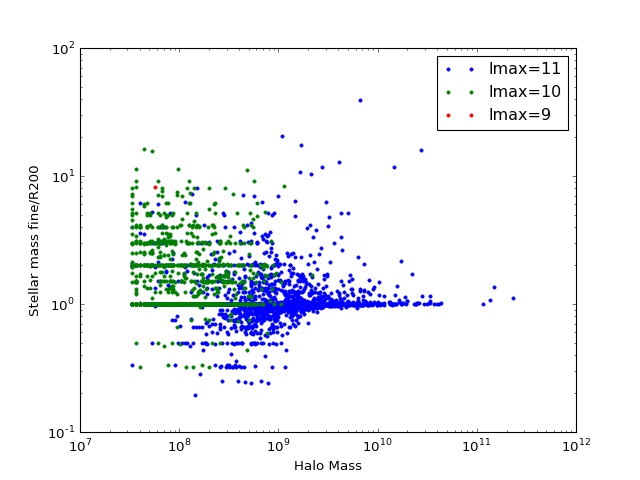

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [47]:
plt.figure()
x=cur_step.fof.halo_mass_fine
y=cur_step.fof.star_mass_fine/cur_step.fof.star_mass

# plt.plot(x,y,'.')

mask=lmax==11
plt.plot(x[mask], y[mask],'.', label="lmax=11")
mask=lmax==10
plt.plot(x[mask], y[mask],'.', label="lmax=10")
mask=lmax==9
plt.plot(x[mask], y[mask],'.', label="lmax=9")

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel('Halo Mass')
plt.ylabel('Stellar mass fine/R200')

<IPython.core.display.Javascript object>


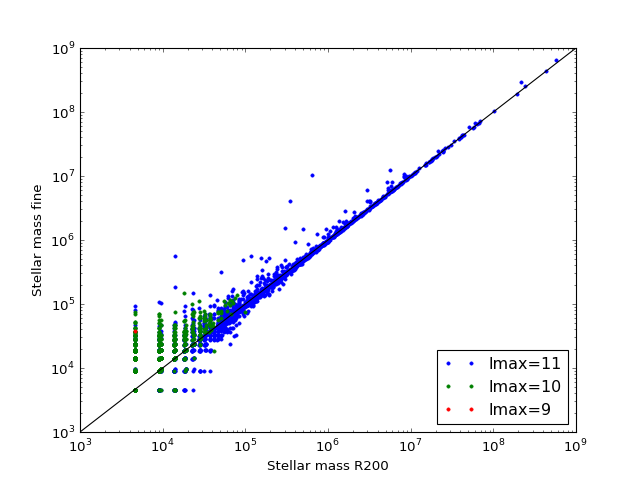

In [45]:
plt.figure()

x=cur_step.fof.star_mass
y=cur_step.fof.star_mass_fine

# plt.plot(x,y,'.')

mask=lmax==11
plt.plot(x[mask], y[mask],'.', label="lmax=11")
mask=lmax==10
plt.plot(x[mask], y[mask],'.', label="lmax=10")
mask=lmax==9
plt.plot(x[mask], y[mask],'.', label="lmax=9")

plt.legend(loc=4)

x=np.logspace(3,9)
plt.plot(x,x,'k')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Stellar mass R200')
plt.ylabel('Stellar mass fine')